In [1]:
from feedback import *
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

In [2]:
nas_path = "./dataset_1401/"
lineage_label = np.array(pd.read_csv('./dataset_1401/1404_lineage_report and metadata 20220316.csv')[['lineage_x','diff']])
label_ = []
new_lineage_label = []
for idx, rna in enumerate(SeqIO.parse('./dataset_1401/1404.sequences.aln.fasta',"fasta")):
    if "B.1.617.2" == lineage_label[idx][0]:
    # break
    # print(lineage_label[idx][0].split(' ')[0])
        label_.append(lineage_label[idx][1].split(' ')[0])

        new_lineage_label.append(str(rna.seq))

In [3]:
print('sample:', len(new_lineage_label))
# kmer_3 = []
# for Seq in new_lineage_label:
#         temp_store = []
#         for i in range(len(Seq)):
#             if len(Seq[i:i+3])==3:
                
#                 temp_store.append(''.join(Seq[i:i+3]))
#         kmer_3.append(temp_store)

sample: 1135


In [4]:
class_,_ ,_,_= np.unique(label_,return_counts=True,return_index=True,return_inverse=True)
print(class_)

['N' 'Y']


In [5]:
# # only tcga rna unit
def clean(x):
	x = x.upper() 
	
	if x == 'T' or x == 'A' or x == 'G' or x == 'C' or x == '-' or x == 'N':
		return x

	if x == 'U' or x == 'Y':
		return 'T'
	
	if x == 'K' or x == 'S':
		return 'G'

	if x == 'M' or x == 'R' or x == 'W' or x == 'H' or x=='V' or x=='D':
		return 'A'

	if x== 'B':
		return 'C'
from itertools import product
dict_search = {}
for idx, i in enumerate('-NACGT'):

    dict_search[i] = idx
print(dict_search)
from tqdm.notebook import tqdm
num_new_sequences =[]
for k in tqdm(new_lineage_label):
	temp_store=[]
	for j in k:
		temp_store.append(dict_search[clean(j)])
	num_new_sequences.append(temp_store)
total_sequence_array = np.array(num_new_sequences)
print(total_sequence_array.shape)


{'-': 0, 'N': 1, 'A': 2, 'C': 3, 'G': 4, 'T': 5}


  0%|          | 0/1135 [00:00<?, ?it/s]

(1135, 29903)


In [6]:
class_dict_ = {}
for idx, i in enumerate(class_):
    class_dict_[i] = idx
print(class_dict_)
multi_label = []
for i in label_:
    multi_label.append(class_dict_[i])

{'N': 0, 'Y': 1}


In [7]:
print(label_[0:20])
print(multi_label[0:20])

['Y', 'N', 'N', 'Y', 'N', 'N', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'N', 'Y']
[1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1]


In [8]:
total_sequence_array.shape

(1135, 29903)

In [9]:
from pyDeepInsight import ImageTransformer, LogScaler
from sklearn.manifold import TSNE
from tqdm.notebook import tqdm
ln = LogScaler()
X_train_norm = ln.fit_transform(total_sequence_array)
tsne = TSNE(n_components=2, perplexity=30, metric='cosine',
            random_state=1701, n_jobs=-1)

it = ImageTransformer(feature_extractor=tsne, pixels=400)
X_train_img = it.fit_transform(X_train_norm)

/home/john/anaconda3/envs/deepinsightlearning/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/john/anaconda3/envs/deepinsightlearning/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/home/john/anaconda3/envs/deepinsightlearning/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning,


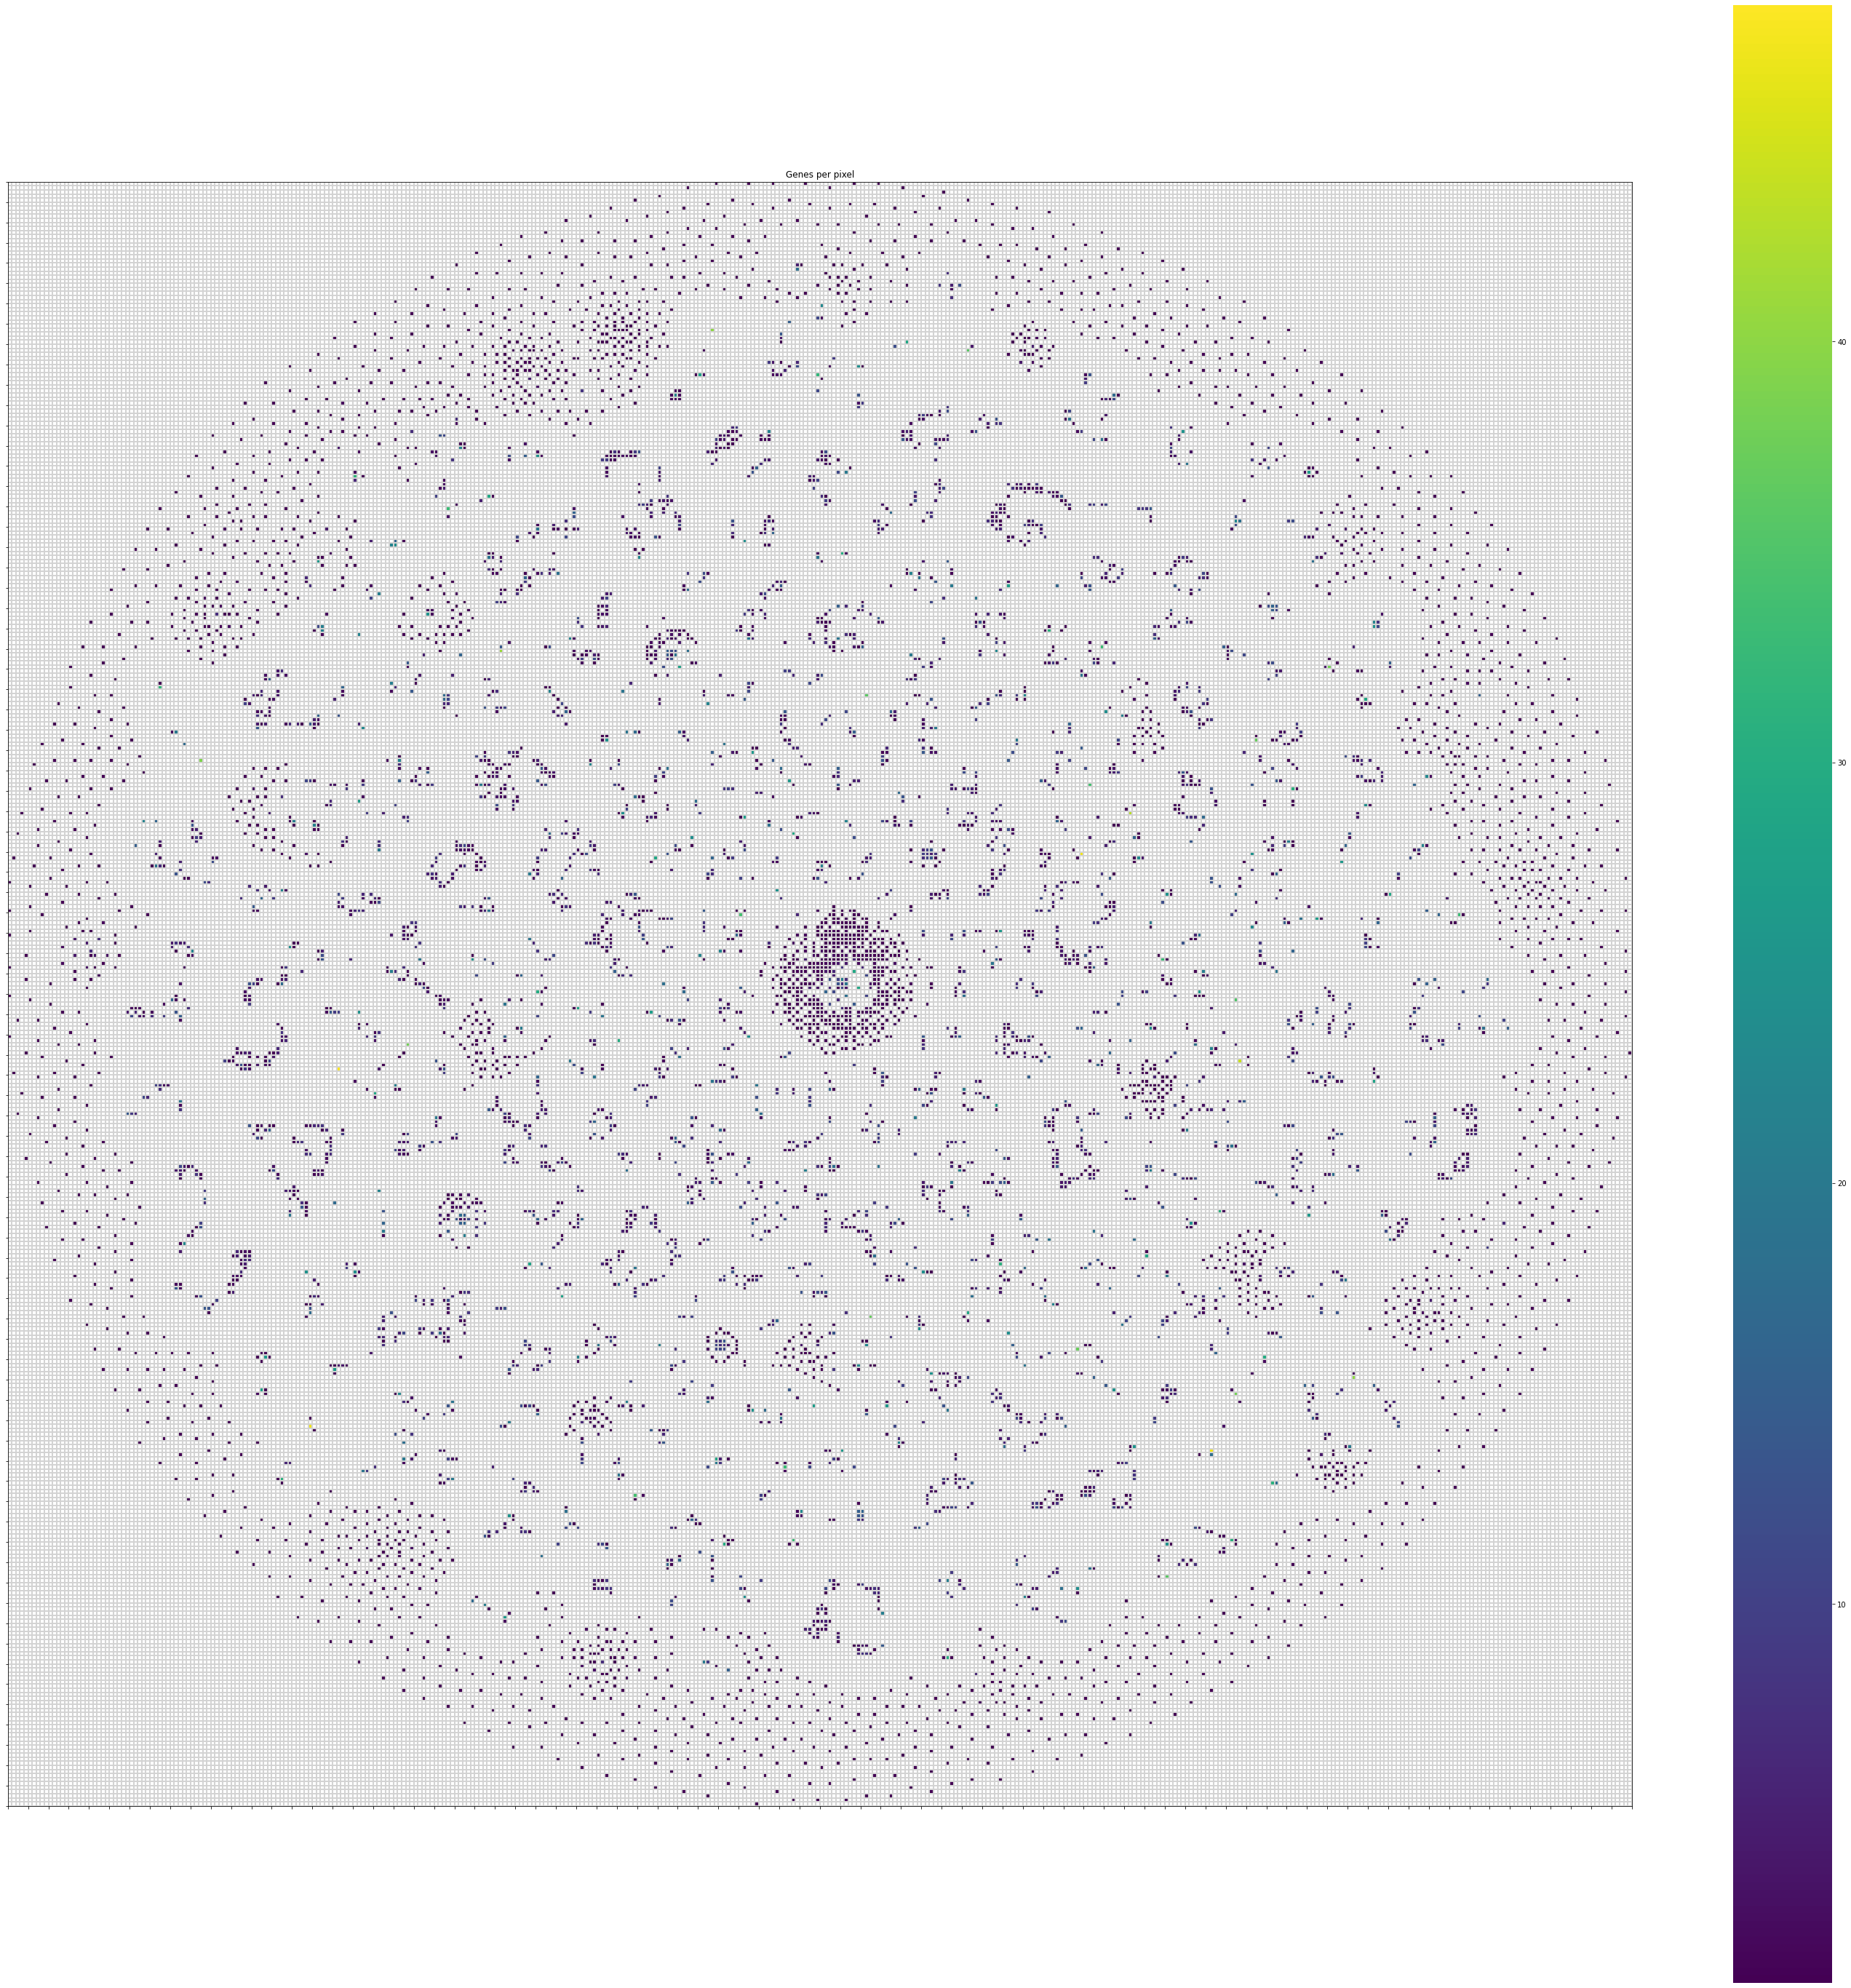

In [19]:
fdm = it.feature_density_matrix()
fdm[fdm == 0] = np.nan

plt.figure(figsize=(50, 50))

ax = sns.heatmap(fdm, cmap="viridis", linewidths=0.01, 
                 linecolor="lightgrey", square=True)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
for _, spine in ax.spines.items():
    spine.set_visible(True)
_ = plt.title("Genes per pixel")

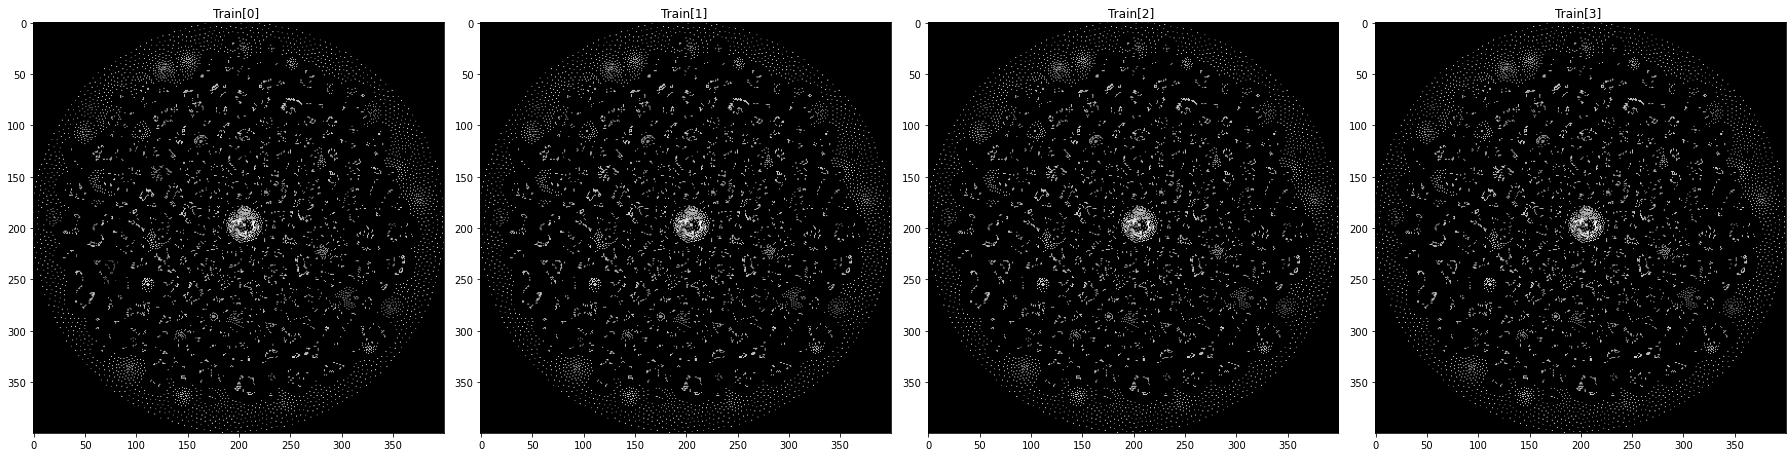

In [11]:
fig, ax = plt.subplots(1, 4, figsize=(25, 7))
for i in range(0,4):
    ax[i].imshow(X_train_img[i])
    ax[i].title.set_text("Train[{}] ".format(i))
plt.tight_layout()

In [12]:
print(it.feature_density_matrix().shape)
print(it.coords().shape)

(400, 400)
(29903, 2)


In [13]:
# np.save("deepinsight_location_npy/feature_density_matrix_[NACGTRYKMSWBDHV]-multiclass=1404.npy",it.feature_density_matrix())
# np.save("deepinsight_location_npy/coords_[NACGTRYKMSWBDHV]-multiclass=1404.npy",it.coords())
np.save("deepinsight_location_npy/feature_density_matrix_[NACGT]-binaryclass=1135_400px.npy",it.feature_density_matrix())
np.save("deepinsight_location_npy/coords_[NACGT]-binaryclass=1135_400px.npy",it.coords())

In [14]:
# multiclass_nactg multiclass_totalunit
save_path = './np_image_totalunit/binaryclass_nactg_400px/'
if not os.path.exists(save_path):
    os.mkdir(save_path)
if not os.path.exists(os.path.join(save_path,'image_npy')):
    os.mkdir(os.path.join(save_path,'image_npy'))

np.save(f'{save_path}/label.npy',multi_label)
for idx, image in enumerate(X_train_img):
    if (idx)<10:
        np.save(f"{save_path}/image_npy/000{idx}.npy", image)
    elif (idx)<100:
        np.save(f"{save_path}/image_npy/00{idx}.npy", image)
    elif (idx)<1000:
        np.save(f"{save_path}/image_npy/0{idx}.npy", image)
    else:
        np.save(f"{save_path}/image_npy/{idx}.npy", image)


In [15]:
# fig, ax = plt.subplots(1, 4, figsize=(25, 7))
# for i in range(0,4):
#     ax[i].imshow(X_train_img[i], cmap='bone')
#     ax[i].title.set_text("Train[{}] - class '{}'".format(i, ""))
# plt.tight_layout()

In [16]:
# from PIL import Image

# new_p = Image.fromarray((X_train_img[0]*255).astype(np.uint8))
# if new_p.mode != 'RGB':
#     new_p = new_p.convert('RGB')
# new_p.save("filename.png")

In [17]:
# fig, ax = plt.subplots(1, 4, figsize=(25, 7))
# for i in range(0,4):
#     ax[i].imshow(X_train_img[i][:,:,0], cmap='bone')
#     ax[i].title.set_text("Train[{}] - class '{}'".format(i, ""))
# plt.tight_layout()

In [18]:
from PIL import Image
